## Team 4

#### Abdulaziz Alsulami

#### Razan Alsulieman
#### Smouh Alqahtani

### Kaggle Notebook Link
https://www.kaggle.com/engabdulaziz/houses-prices-prediction

### github link
https://github.com/engazeez/Houses-Prices-Prediction

## Problem Statement

The competition is about ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. 

The obtained data set from a Kaggle competition named House Prices: Advanced Regression Techniques  proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. Given 79 explanatory variables almost describe every aspect of residential homes in Ames, Iowa. 

We have build predictive models using Advanced Regression Techniques, train the model, and find the best model that it can accurately estimate the final price of each house.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

## Features Describtion

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature 
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Explore Data

In [2]:
train_df = pd.read_csv('../data/train_house.csv')
test_df = pd.read_csv('../data/test_house.csv')

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [112]:
train_df.shape

(1460, 81)

In [113]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [114]:
test_df.shape

(1459, 80)

In [4]:
# train dataframe

num_featrues=[]
cat_features=[]

for feature, d_type in train_df.dtypes.items():
    if d_type in [int, float]:
        num_featrues.append(feature)
    else:
        cat_features.append(feature)
        
print(f'We have {len(num_featrues)} numerical features')
print(f'We have {len(cat_features)} categorical features')

We have 3 numerical features
We have 78 categorical features


In [5]:
# test dataframe

num_featrues=[]
cat_features=[]

for feature, d_type in test_df.dtypes.items():
    if d_type in [int, float]:
        num_featrues.append(feature)
    else:
        cat_features.append(feature)
print(f'We have {len(num_featrues)} numerical features')
print(f'We have {len(cat_features)} categorical features')

We have 11 numerical features
We have 69 categorical features


## Data Visualization (EDA)

In [117]:
# divid train features to eight sets each set has ten featrues for visualizing 

# remove id and SalePrice from train dataframe
cols = [col for col in train_df.columns if col not in ['Id', 'SalePrice'] ]

# group features to eight set each set has ten features
cols_group = {
    'first': cols[:10],
    'scond': cols[10:20],
    'third': cols[20:30],
    'fourth': cols[30:40],
    'fifth': cols[40:50],
    'sixth': cols[50:60],
    'seventh': cols[60:70],
    'eighth': cols[70:79]
}

# for each set print the set name and their features
for k, v in cols_group.items():
    print(f'The {k} ten features:\n {v}' )

The first ten features:
 ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig']
The scond ten features:
 ['LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd']
The third ten features:
 ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
The fourth ten features:
 ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC']
The fifth ten features:
 ['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
The sixth ten features:
 ['BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish']
The seventh te

**The first ten features**

In [118]:
train_df[train_df.columns[2:12]].nunique()
#df[cols[i]].nunique()

MSZoning          5
LotFrontage     110
LotArea        1073
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
dtype: int64

In [119]:
def subplots_ten_columns(df, cols):
    """
    returns to ten graphs each graph shows the relationship between SalePrice and specific feature
    if feature is numeric the graph will be line chart otherwise bar chart
    """
    
    nrows= int(np.ceil(10/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,8), constrained_layout=True)
    ax = ax.ravel()
    
    for i in range(len(cols)):
        
        if df[cols[i]].nunique()> 10:
            sns.lineplot(x=df[cols[i]], y=df['SalePrice'], data=df, ax=ax[i]).set_title(f'SalePrice vs {cols[i]} with datatype of {df[cols[i]].dtypes}')
            
        else:
            sns.barplot(y=df[cols[i]], x=df['SalePrice'], data=df, orient='h', ax=ax[i]).set_title(f'{cols[i]} vs SalePrice with datatype of {df[cols[i]].dtypes}');


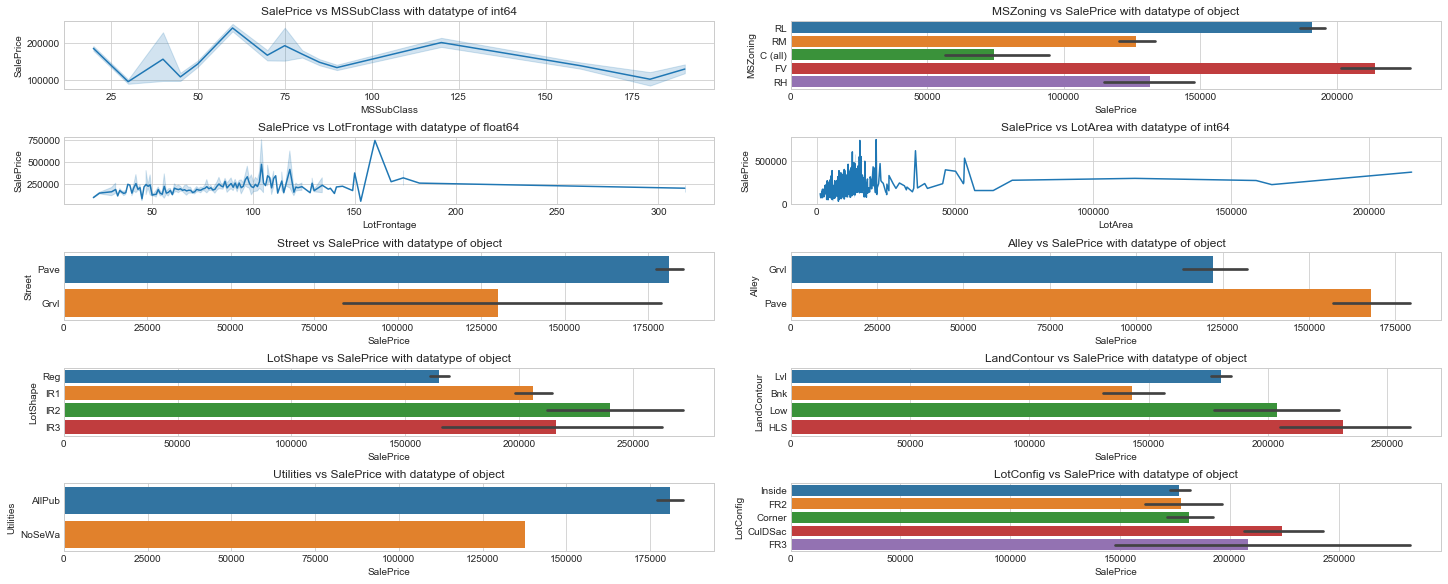

In [120]:
subplots_ten_columns(train_df, cols[:10])

- SalePrice vs MSSubClass: with different classes, the sale prices were in the range between 100,000 to 200,000 but the highest price was with claas 60.
- MSZoning vs SalePrice: We can see the FV and RL zone was the highest average of sale preice with 220,000 and 180,000 respectivley while others were less than 150,000.
- Sale Price vs LotFrontage: with different line feets of street most sale prices were in the range between 250,000 to 500,000 while the highest price was at line feet of street about 170,000.
- Sale Price vs LotArea:  sale prices were frugtuated unitl at 65,000 then stay constant with different lot sizes
- Steet vs SalePrice: the highest sale price average was over 175,000 at Pave street while Grvl street was the lowest with sale price about 126,000
- Alley vs SalePrice: we can see inversly relationship between street and alley with the sale price
- LandContour vs SalePrice: average sale prices of Land Counter HLS and Low were over 200,000 while others less than 200,000
- Utilities vs SalePrice: AllPub utility had the highest sale price about 176,000 while NoSeWa was the lowest
- LoConfig vs salePrice: CulDSac and FR3 were higher sale price average over 200,000 while others were near 160,000

****The second ten features****

In [28]:
def subplots_ten_columns(df, cols):
    """
    returns to ten graphs each graph shows the relationship between SalePrice and specific feature
    if feature is numeric the graph will be line chart otherwise bar chart
    """
    
    nrows= int(np.ceil(10/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,10), constrained_layout=True)
    ax = ax.ravel()
    
    for i in range(len(cols)):
        
        if df[cols[i]].nunique()> 10:
            
            if cols[i] == 'Neighborhood':
                labels = train_df.iloc[:,12].unique().tolist()
                sns.lineplot(x=df[cols[i]], y=df['SalePrice'], data=df, ax=ax[i])
                ax[i].set_xticklabels(labels=labels,rotation=50)
                
            else:
                sns.lineplot(x=df[cols[i]], y=df['SalePrice'], data=df, ax=ax[i])

        else:
            sns.barplot(y=df[cols[i]], x=df['SalePrice'], data=df, orient='h', ax=ax[i]);


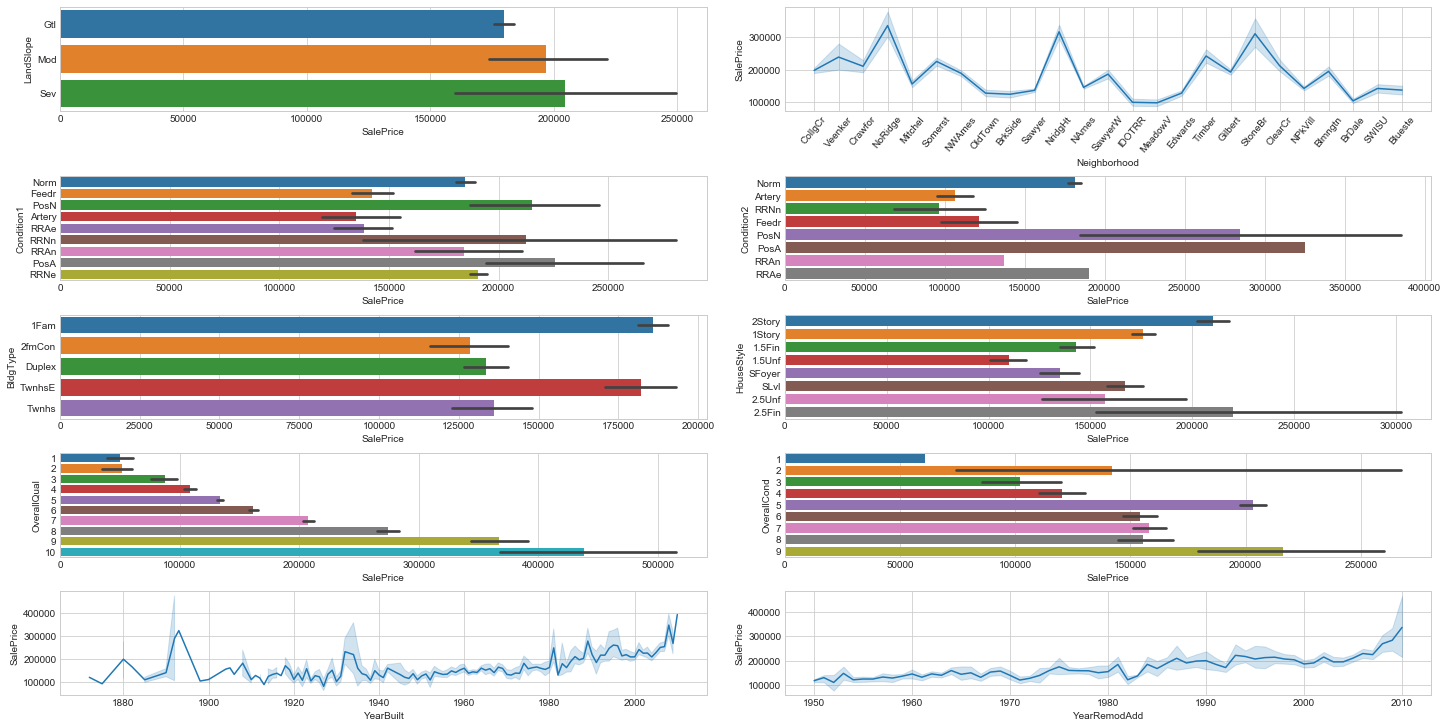

In [29]:
subplots_ten_columns(train_df, cols[10:20])

In [21]:
cols[10:20]

['LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd']

- LandSlope vs SalePrice: LandSlopes were near in the range 175,000 to 200,000
- SalePrice vs Neighborhood: Crawfor, Sawyer and Gilbert were the top of slae prices average about 300,000 while the bottom of sale price average were Sawview, idtorr and Brdale 
- Condition1 and Condition2 vs SalePrice: Condition2 was higher range of sale prices average than Condition1 about 100,000 to 345,000 
- BldgType vs SalePrices: IFam and TwnhsE were higher sale prices average than other about 176,000 while others were less than 130,000.
- HouseStyle vs SalePrice: 2Story and 2.5Fin were higher sale prices average than other about over 200,000 while others were less than 1750,000
- OverallQual and OverallCond vs SalePrice: quality had gradualy increased with sale prices average from 1 to 10 while ratings were different so 9 and 5 were the highest sale average prices
- YearBuilt and YearRemodAdd vs SalePrice: yearBuilt and Remodal date were fregtuaed so the top of sale price average was about 300,000 and the bottom was about 110,000

**The third ten features**

In [12]:
def subplots_ten_columns(df, cols):
    
    nrows= int(np.ceil(10/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10), constrained_layout=True)
    ax = ax.ravel()
    
    for i in range(len(cols)):
        
        if df[cols[i]].nunique()> 10:
                
            if cols[i] in ['Exterior1st', 'Exterior2nd']:
                labels = train_df.iloc[:,12].unique().tolist()
                sns.lineplot(x=df[cols[i]], y=df['SalePrice'], data=df, ax=ax[i])
                ax[i].set_xticklabels(labels=labels,rotation=45)
                
            else:
                sns.lineplot(x=df[cols[i]], y=df['SalePrice'], data=df, ax=ax[i])

        else:
            sns.barplot(y=df[cols[i]], x=df['SalePrice'], data=df, orient='h', ax=ax[i]);


<ipython-input-12-dc526380e89e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(labels=labels,rotation=45)
<ipython-input-12-dc526380e89e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(labels=labels,rotation=45)


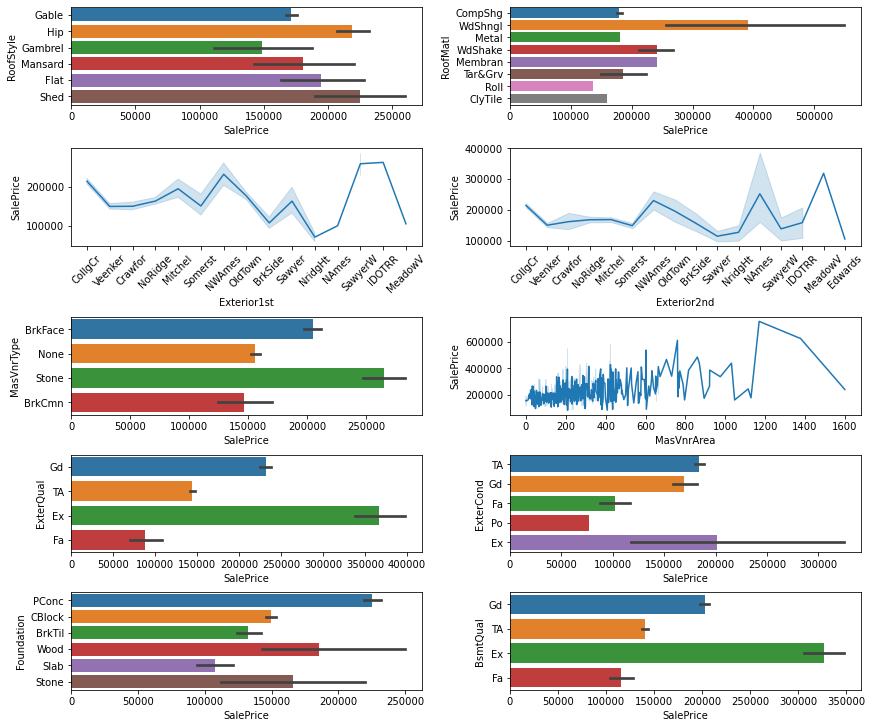

In [13]:
subplots_ten_columns(train_df, cols[20:30])

In [22]:
cols[20:30]

['RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual']

- RoofStyle vs SalePrice: Hip and Shed were higher sale prices average than other about 225,000 while others were less than 200,000
- RoofMatl vs SalePrice: WdShngl was the highest sale price average about 395,000 while others 140,000 to 240,000
- Exterior1st and Exterior2nd vs SalePrice: Exterior1st and Exterior2nd were fructuated in the range of sale prices average 100,000 to 200,000 unitl Sawyew and IDOTRR in Exterior1st and Sawyew in Exterior2nd were the top of sale prices average about 300,000
- MasVnrType vs SalePrice: Stone was higher sale price average than other about 265,000 while others less than 210,000
- SalePrice vs MasVnrArea: Sale prices average were fructated in the range of 100,000 to 500,000 with different area values however the top was at area 1200 with sale price average about 695,000
- ExterQual and ExterCond vs SalePrice: Ex and Gd in ExterQual and Ex and TA were the highest sale prices average and Fa in ExterQual and Po ExterCond were the lowest.
- Foundation vs SalePrice: Pconc was higher sale price average than other about 225,000 while others were less than 200,000
- BsmtQual vs SalePrice: Ex was the top of sale price average about 330,000 while Fa was the bottom about 120,000

**The forth ten features**

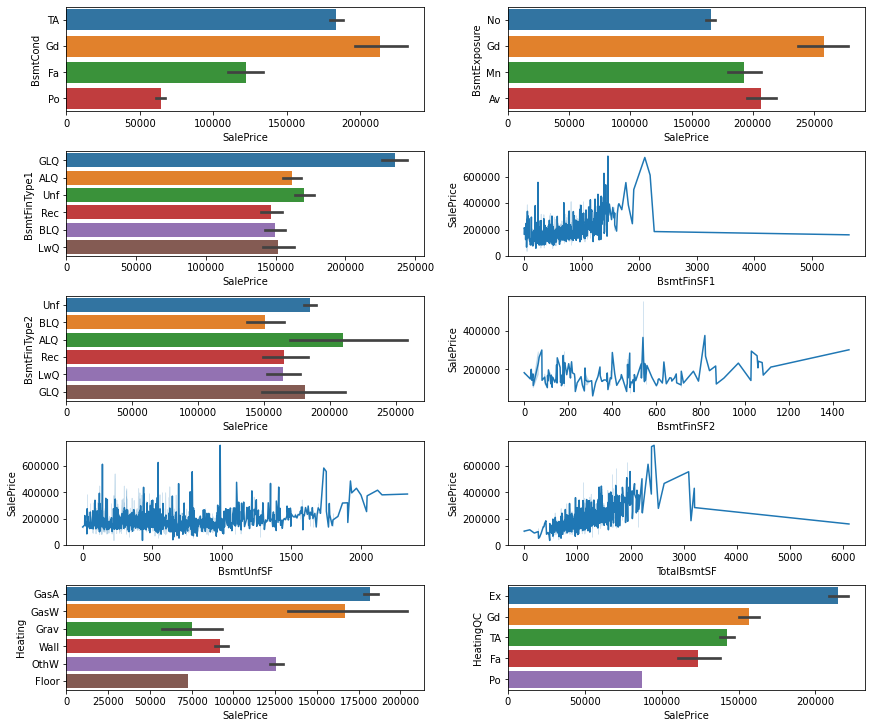

In [14]:
subplots_ten_columns(train_df, cols[30:40])

In [24]:
cols[30:40]

['BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC']

- BsmtCond vs SalePrice: Gd and Ta were the top of sale price average over than 175,000 while others les than 130,000
- BsmtExposure vs SalePrice: Gd was the top of sale price average over than 250,000 while others were less than 220,000
- BsmtFinType1 vs SalePrice: GLQ was the top of sale price average about 240,000 while others were in the range 150,000 to 170,000
- SalePrice vs BsmtFinSF1: Sale prices average were fructuated in the range 120,000 to 600,000 unitl BsmtFinType2 became 1500 and 2100 so were the top of sale prices average after that stay same sale price average.
- BsmtFinType2 vs SalePrice: AlQ, Unf and GLQ were the top of sale price average over 175,000 while others less 160,000
- SalePrice vs BsmtUnfSF2; The top of sale price average was at BsmtUnfSF 580 and 810 about 390,000 
- SalePrice vs BsmtUnfSF and TotalBsmtSF: the top of sale price average at BsmtUnfSF 980 and TotalBsmtSF 245 about 700,000
- Heating vs SalePrice: The top were GasA and GasW with sale price average about 165,000 and 180,000 respectively while others less than 125,000
- HeatingQC vs SalePrice: inversly relationship was between HeatingQC and Sale prices average

**The fifth ten features**

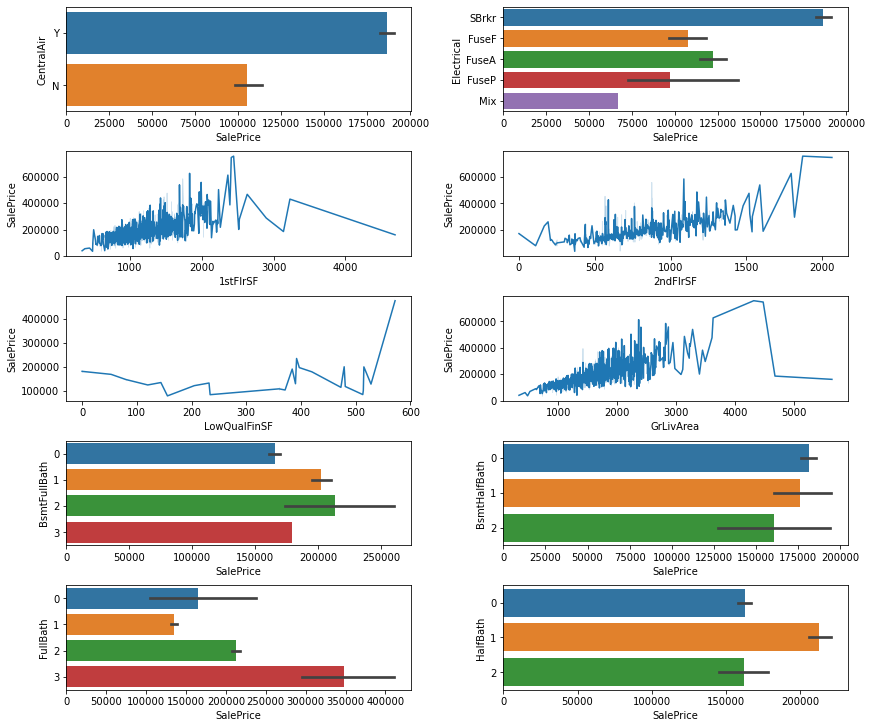

In [15]:
subplots_ten_columns(train_df, cols[40:50])

In [25]:
cols[40:50]

['CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath']

- HeatingQC vs SalePrice: sale prices average at Y were higher than N 
- Electrical vs SalePrice: Sbrk was the top of sale prices average about 185,000 while others were less than 125,000
- SalePrice vs 1stFlrSF and 2ndFlrSF : at 1stFlrSF, sale prices average were fructuaed until about 700,000 with 2400 then dropped and at 2ndFlrSF, sale prices average were fructuated towared the high level until the top at 4250 with sale price average about 700,000
- SalePrice vs LowQualFinSF: sale prices averages were less than 200,000 at LowQualFinSF reached 530 then jumpped to became 500,000 at 580
- SalePrice vs GrLivArea: sale prices average started from the lowest level then fructuated in the level less than 500,000 unitl 380 then rose to became the highest level of sale prices average about 700,000 at 430 then sharply dropped to the lowest level after that stay constant
- BsmtFullBath vs SalePrice: the top of BsmtFullBath were 2 and 1 over 200,000 of sale prices average while others were less than that average
- BsmtHalfBath vs SalePrice: inversly relationship between BsmtHalfBath and sale prices average
- FullBath vs SalePrice: the top was 3 near 350,000 while others less than 220,000
- HalfBath vs SalePrice: the top was 1 over than 200,000 while others less 160,000

**The sixth ten features**

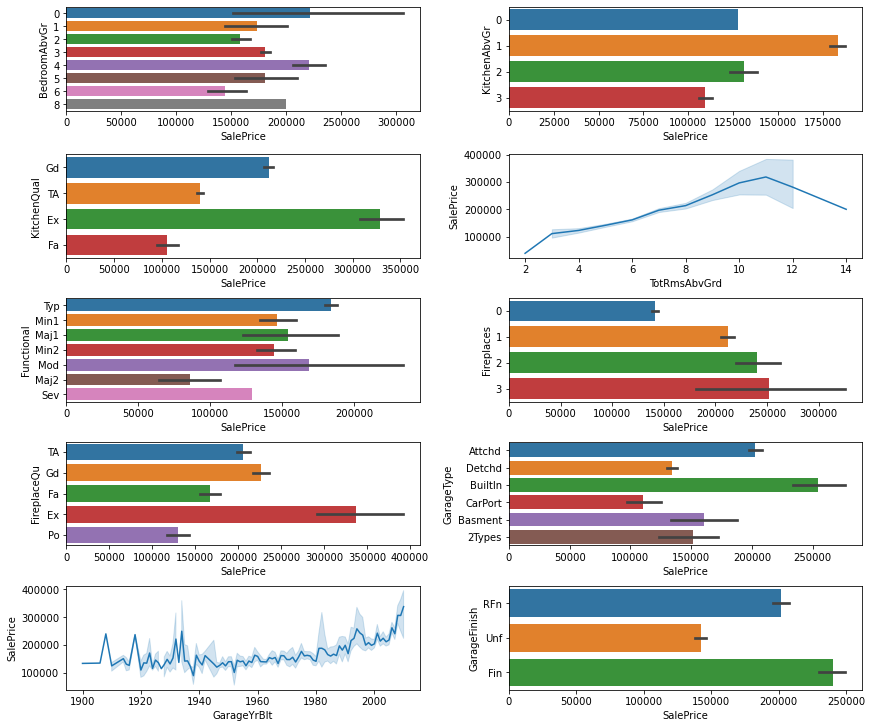

In [16]:
subplots_ten_columns(train_df, cols[50:60])

In [26]:
cols[50:60]

['BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish']

- BedroomAbvGr vs SalePrice: 0, 4 and 8 were sale prices average over than 200,000 while others less than 175000
- KitchenAbvGr vs SalePrice: 1 was the top of sale prices average over than 175,000 while others less than 130,000
- KitchenQual vs SalePrice: Ex was the top of sale prices average over than 300,000 while others less than 210,000
- SalePrice vs TotRmsAbvGrd: Sale prices average were gradualy increased until reached the top at 11 then dropped 
- Functional vs SalePrice: Typ and Mod were the top of sale prices average over than 200,000 while others less than that
- Fireplaces vs SalePrice: positive relationship between Fireplaces and sale prices average
- FireplaceQu vs SalePrice: Ex was the top of sale price average over than 300,000 while others less than 250,000
- GarageType vs SalePrice: Builtin was the top of sale price average near 250,000 while others less than 200,000
- SalePrice vs GarageYrBlt: GarageYrBlt were fructuated in the range of sale prices average between 100,000 and 210,000 until exceeded 2000 then rose to became 320,000
- GarageFinish vs SalePrice: Fin was the top of sale prices average about 245,000 while otheres less than 200,000

**The seventh ten features**

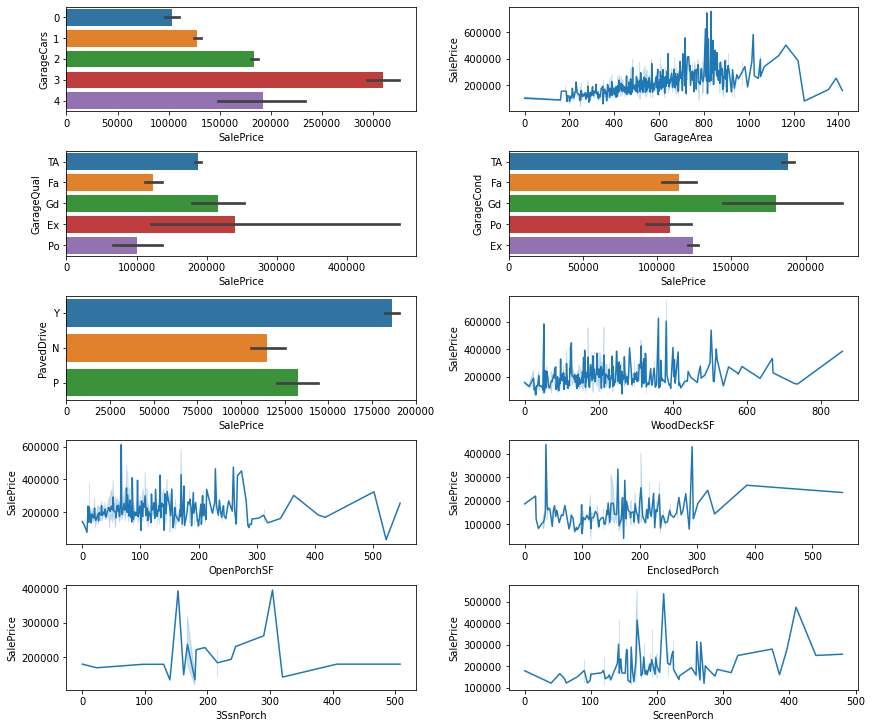

In [17]:
subplots_ten_columns(train_df, cols[60:70])

In [27]:
cols[60:70]

['GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch']

- GarageCars vs SalePrice: 3 was the top of sale price average over than 300,000 while others were less than 200,000 
- SalePrice vs GarageArea: sale prices average were fructuated in the range 100,000 to 400,000 until GarageArea became 800 to became 700,000 dropped.
- GarageQual and GarageCond vs SalePrice: in GarageQual Ex and Gd were the top of sale Prices average over than 200,000 while  GarageCond Ta and Gd were the top of sale prices average over than 175,000
- PavedDrive vs SalePrice: Y was the top of sale prices average over 175,000 while others were less than 130,000
- SalePrice vs WoodDeckSF: at WoodDeckSF 50, 380 and 390 sale prices average were the top about 600,000 
- SalePrice vs OpenPorchSF: Sale prices average were fructuared in the range between 100,000 to 400,000 except OpenPorchSF 80 so was at the top of sale prices average about 600,000
- SalePrice vs EnclosedPorch: the top of sale prices average were about 420,000 at EnclosedPorch 45 and 290,000
- SalePrice vs 3SsnPorch: the top of sale prices average were about 400,000 at 3SsnPorch 150 and 350
- SalePrice vs ScreenPorch: the top of sale prices average were over than 500,000 while others in the range between 100,000 and 400,000

**The eighth ten features**

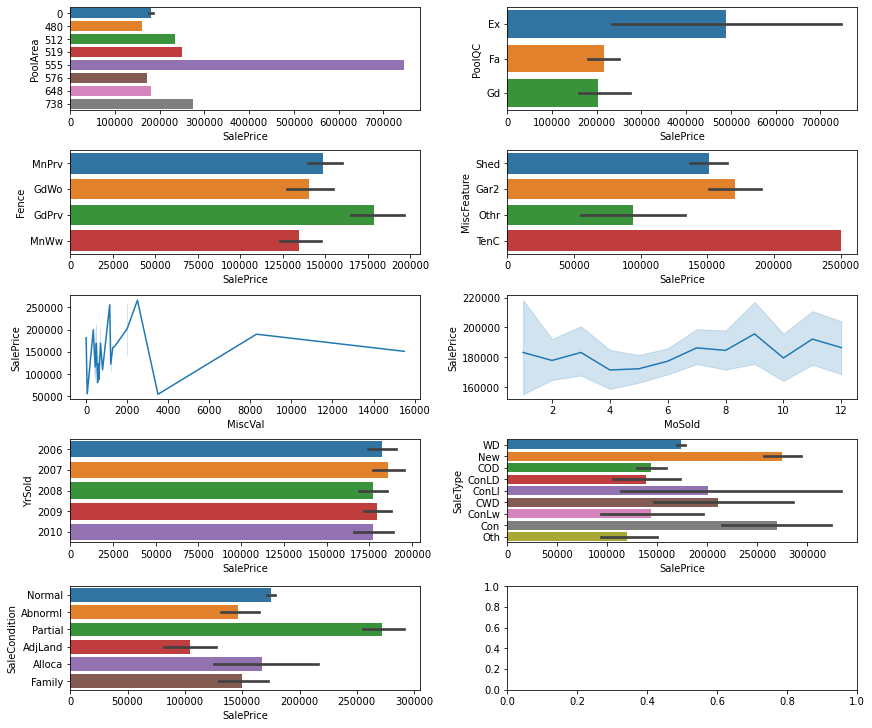

In [18]:
subplots_ten_columns(train_df, cols[70:79])

In [28]:
cols[70:79]

['PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

- PoolArea vs SalePrice:  at PoolArea 555 was the top of sale prices average about over than 700,000 while others less than 300,000
- PoolQC vs SalePrice: Ex was the top of sale prices average about 500,000 while others less than 210,000
- Fence vs SalePrice: GdPrv was the top of sale prices average about over 1750,000 while others less than 150,000
- MiscFeature vs SalePrice: TenC was the top of sale prices average about 250,000 while others less than 1750,000
- SalePrice vs MiscVal: the top of sale prices average were 250,000 at 55 and 210 
- SalePrice vs MoSold: sale prices average were fructuated in the range between 170,000 and 190,000
- YrSold vs SalePrice: most of year sold were over 175,000 allo of them were nearly
- SaleType vs SalePrice: New and Can were the top sale prices average over than 250,000 while otheres less than 210,000
- SaleCondition vs SalePrice: Partial was the top sale prices average over than 250,000 while others less than 200,000

**Data Cleaning**

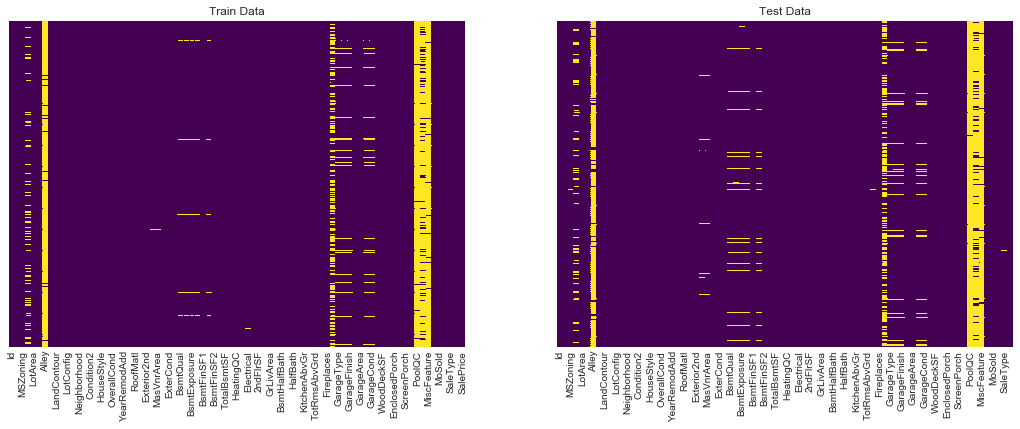

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.heatmap(train_df.isna(), cbar=False, yticklabels=False, ax=ax[0], cmap='viridis').set_title('Train Data')

sns.heatmap(test_df.isna(), cbar=False, yticklabels=False, ax=ax[1], cmap='viridis').set_title('Test Data');

In [31]:
def drop_cols_with_missing_vals(data):
    """
    check all columns with missing vals 
    if column has missing values more than half values
    drop column else if column has less than half values
    check if column category or numeric and then if category
    fill missing values with mode values and if numeric fill
    them with median
    """
    cols_with_missing_vals_more_half= []
    cols_with_missing_vals_less_half= []
    
    for col in data.columns:
        
        if data[col].isna().sum() > (data.shape[0]//2):
            cols_with_missing_vals_more_half.append(col)
            
        elif (data[col].isna().sum() > 0) & (data[col].isna().sum() < data.shape[0]//2):
            cols_with_missing_vals_less_half.append(col)
            
    data = data.drop(cols_with_missing_vals_more_half, axis=1)
    
    for col in data[cols_with_missing_vals_less_half]:
        if (data[col].dtypes == int) or (data[col].dtypes == float):
            data[col] = data[col].fillna(data[col].mean())
            
        elif data[col].dtypes == object:
            max_val = data[col].value_counts().keys()[0]
            data[col] = data[col].fillna(max_val)

    return data

In [32]:
# drop columns from train dataframe
train_df = drop_cols_with_missing_vals(train_df)

# drop columns from test dataframe
test_df = drop_cols_with_missing_vals(test_df)

In [33]:
train_df.shape

(1460, 77)

In [34]:
test_df.shape

(1459, 75)

In [35]:
train_df = train_df.drop(['FireplaceQu', 'Id'], axis=1)

In [36]:
test_df = test_df.drop('Id', axis=1)

In [37]:
train_df.shape

(1460, 75)

In [38]:
test_df.shape

(1459, 74)

In [39]:
for col in train_df.columns:
    if col in test_df.columns:
        pass
    else:
        print(col)

SalePrice


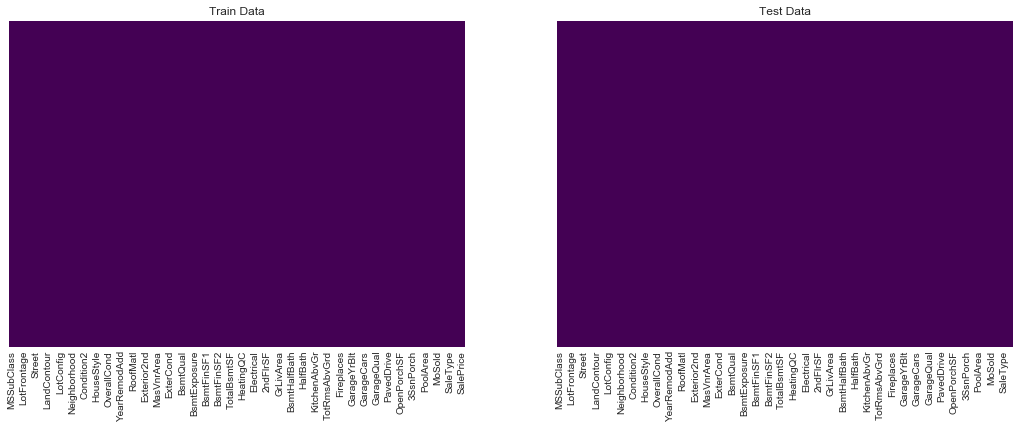

In [40]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

sns.heatmap(train_df.isna(), cbar=False, yticklabels=False, ax=ax[0], cmap='viridis').set_title('Train Data')

sns.heatmap(test_df.isna(), cbar=False, yticklabels=False, ax=ax[1], cmap='viridis').set_title('Test Data');

In [41]:
X_train = train_df.drop('SalePrice', axis=1)
X_test = test_df
y_train = train_df['SalePrice']

In [42]:
# check all featrues are same in train and test dataframe
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [43]:
# check the number of rows and columns 
for i in [X_train, X_test, y_train]:
    print(i.shape)

(1460, 74)
(1459, 74)
(1460,)


In [44]:
# append x_test into x_train 
X = X_train.append(X_test)
X.shape

(2919, 74)

In [48]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [58]:
X.var().head()
for k, v in X.var()[0:10].items():
    print((k, v))

('MSSubClass', 1807.7486762181468)
('LotFrontage', 454.3060686392725)
('LotArea', 62204711.56854423)
('OverallQual', 1.9879511254405646)
('OverallCond', 1.239060059110275)
('YearBuilt', 917.5714302150799)
('YearRemodAdd', 436.57362096223096)
('MasVnrArea', 31907.296988562877)
('BsmtFinSF1', 207510.0881526032)
('BsmtFinSF2', 28620.730288289382)


In [59]:
cols_with_high_var = []
for k, v in X.var().items():
    if v > 1e3:
        cols_with_high_var.append(k)

In [60]:
len(cols_with_high_var)

18

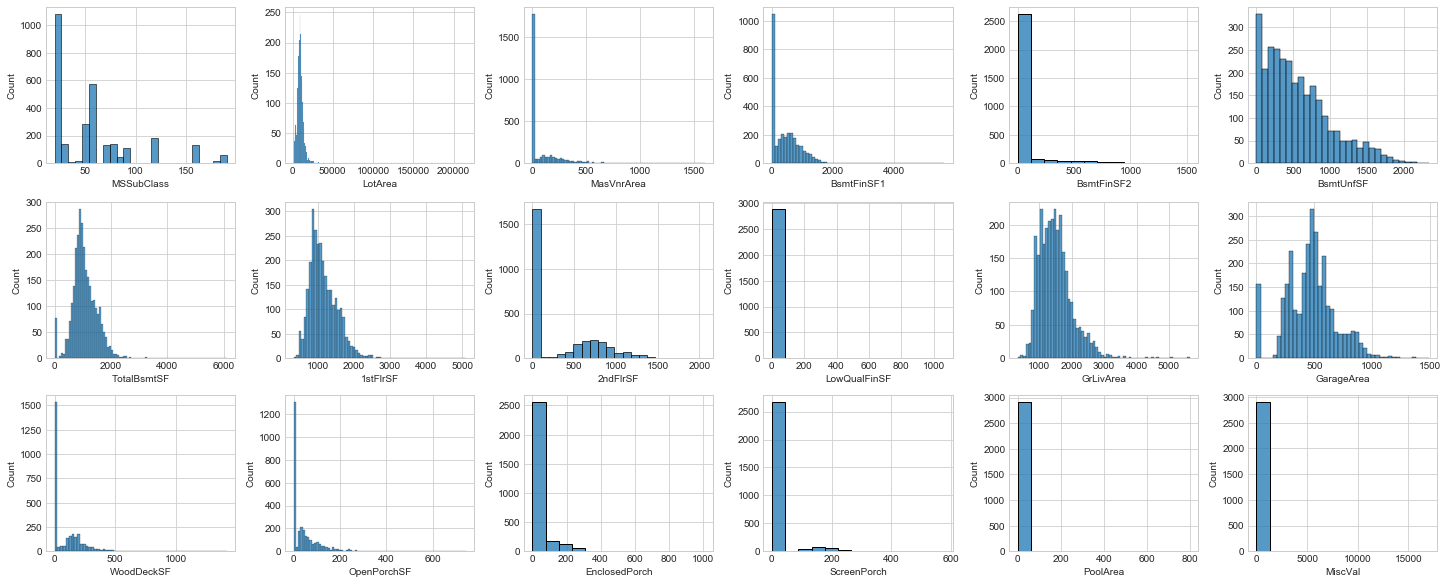

In [61]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(20,8), constrained_layout=True)
ax = ax.ravel()
for i in range(len(cols_with_high_var)):
    sns.histplot(X[cols_with_high_var[i]], ax=ax[i])
plt.show()

In [62]:
new_cols = [col for col in X.columns if (col not in cols_with_high_var)]

In [63]:
X = X[new_cols]

In [66]:
X

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,MoSold,YrSold,SaleType,SaleCondition
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,2.0,TA,TA,Y,0,2,2008,WD,Normal
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,2.0,TA,TA,Y,0,5,2007,WD,Normal
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,2.0,TA,TA,Y,0,9,2008,WD,Normal
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,3.0,TA,TA,Y,0,2,2006,WD,Abnorml
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,3.0,TA,TA,Y,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Unf,0.0,TA,TA,Y,0,6,2006,WD,Normal
1455,RM,21.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,Unf,1.0,TA,TA,Y,0,4,2006,WD,Abnorml
1456,RL,160.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Unf,2.0,TA,TA,Y,0,9,2006,WD,Abnorml
1457,RL,62.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Unf,0.0,TA,TA,Y,0,7,2006,WD,Normal


In [65]:
X.shape

(2919, 56)

In [67]:
X = pd.get_dummies(X, drop_first=True)
X.shape

(2919, 214)

In [68]:
X_train = X[:1460]
X_test = X[1460:]

In [69]:
y_train = y_train.values
y_test = y_train[:1459]

## Create Model

In [70]:
# creat dataframe with two columns the frist columns with model name 
# the second column rmse 

model_lst = pd.DataFrame(
    {
        'Model':[
            'Linear Regression', 
            'Lasso',
            'Ridge',
            'ElasticNet',
            'Random Forest Classifier',
            'Bagging Classifier',
            'Extra tree Classifier'], 
        'RMSE': None,
    }, 

)
model_lst

,Model,RMSE
0,Linear Regression,None
1,Lasso,None
2,Ridge,None
3,ElasticNet,None
4,Random Forest Classifier,None
5,Bagging Classifier,None
6,Extra tree Classifier,None


In [71]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_model_algo(algo, X_train, X_test, y_train, y_test, cv):
    
    # Cross Validation 
    acc_cv = np.mean(cross_val_score(
                                    algo, 
                                    X_train, 
                                    y_train, 
                                    cv=cv, 
                                    n_jobs = -1))
    # Cross-validation accuracy metric
    
    # Test accuracy metric
    algo.fit(X_train, y_train)
    test_pred = algo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    rmae = np.sqrt(mean_absolute_error(y_test, test_pred))
    return test_pred, acc_cv, rmse, rmae

**Linear Regression**

In [72]:
lr = LinearRegression()
pred_test, acc_cv, rmse, rase  = fit_model_algo(lr, X_train, X_test, y_train, y_test, 10)
print(f'Cross Validation Average Score: {acc_cv}')
print(f'Root Mean Square Error: {rmse}')
print(f'Root Absolute Square Error: {rase}')

Cross Validation Average Score: 0.7982601490815532
Root Mean Square Error: 110703.0972700353
Root Absolute Square Error: 284.9338927942724


In [73]:
model_lst['RMSE'][0] = rmse 
model_lst

,Model,RMSE
0,Linear Regression,110703.09727
1,Lasso,None
2,Ridge,None
3,ElasticNet,None
4,Random Forest Classifier,None
5,Bagging Classifier,None
6,Extra tree Classifier,None


**Lasso**

In [74]:
lasso = LassoCV(
                max_iter=1e6, 
                alphas=[0.0002, 0.0003, 0.0004, 0.0005, 0.1, 0.3, 0.4, 0.6, 0.8, 1.0],
                cv=5
)

In [75]:
pred_test, acc_cv, rmse, rase  = fit_model_algo(lasso, X_train, X_test, y_train, y_test, 10)
print(f'Cross Validation Average Score: {acc_cv}')
print(f'Root Mean Square Error: {rmse}')
print(f'Root Absolute Square Error: {rase}')

Cross Validation Average Score: 0.8034606698581184
Root Mean Square Error: 110624.57139806484
Root Absolute Square Error: 284.8444820300501


In [76]:
model_lst['RMSE'][1] = rmse 
model_lst

,Model,RMSE
0,Linear Regression,110703.09727
1,Lasso,110624.571398
2,Ridge,None
3,ElasticNet,None
4,Random Forest Classifier,None
5,Bagging Classifier,None
6,Extra tree Classifier,None


**Ridge**

In [77]:
ridge = RidgeCV(
                alphas=[0.0002, 0.0003, 0.0004, 0.0005, 0.1, 0.3, 0.4, 0.6, 0.8, 1.0],
                cv=5
)

In [78]:
pred_test, acc_cv, rmse, rase  = fit_model_algo(ridge, X_train, X_test, y_train, y_test, 10)
print(f'Cross Validation Average Score: {acc_cv}')
print(f'Root Mean Square Error: {rmse}')
print(f'Root Absolute Square Error: {rase}')

Cross Validation Average Score: 0.8379383470060514
Root Mean Square Error: 109820.2434114722
Root Absolute Square Error: 284.40926960812


In [79]:
model_lst['RMSE'][2] = rmse 
model_lst

,Model,RMSE
0,Linear Regression,110703.09727
1,Lasso,110624.571398
2,Ridge,109820.243411
3,ElasticNet,None
4,Random Forest Classifier,None
5,Bagging Classifier,None
6,Extra tree Classifier,None


**ElasticNet**

In [80]:
elastic = ElasticNetCV(
                    max_iter=1e4,
                    alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.001, 0.1, 1.0],
                    l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1]
)

In [81]:
pred_test, acc_cv, rmse, rase  = fit_model_algo(elastic, X_train, X_test, y_train, y_test, 10)
print(f'Cross Validation Average Score: {acc_cv}')
print(f'Root Mean Square Error: {rmse}')
print(f'Root Absolute Square Error: {rase}')

Cross Validation Average Score: 0.8423571009517696
Root Mean Square Error: 108687.96033710791
Root Absolute Square Error: 283.6939207488583


In [82]:
model_lst['RMSE'][3] = rmse 
model_lst

,Model,RMSE
0,Linear Regression,110703.09727
1,Lasso,110624.571398
2,Ridge,109820.243411
3,ElasticNet,108687.960337
4,Random Forest Classifier,None
5,Bagging Classifier,None
6,Extra tree Classifier,None


**Random Forest**

In [83]:
rf = RandomForestRegressor()
pred_test_rf, acc_cv, rmse, rase  = fit_model_algo(rf, X_train, X_test, y_train, y_test, 10)
print(f'Cross Validation Average Score: {acc_cv}')
print(f'Root Mean Square Error: {rmse}')
print(f'Root Absolute Square Error: {rase}')

Cross Validation Average Score: 0.8226380283628754
Root Mean Square Error: 107042.41059110066
Root Absolute Square Error: 279.8780353921982


In [84]:
model_lst['RMSE'][4] = rmse 
model_lst

,Model,RMSE
0,Linear Regression,110703.09727
1,Lasso,110624.571398
2,Ridge,109820.243411
3,ElasticNet,108687.960337
4,Random Forest Classifier,107042.410591
5,Bagging Classifier,None
6,Extra tree Classifier,None


**Bagging Regressor**

In [85]:
br = BaggingRegressor()
pred_test, acc_cv, rmse, rase  = fit_model_algo(br, X_train, X_test, y_train, y_test, 10)
print(f'Cross Validation Average Score: {acc_cv}')
print(f'Root Mean Square Error: {rmse}')
print(f'Root Absolute Square Error: {rase}')

Cross Validation Average Score: 0.8130708369092208
Root Mean Square Error: 108297.2137031877
Root Absolute Square Error: 281.5990537507857


In [86]:
model_lst['RMSE'][5] = rmse 
model_lst

,Model,RMSE
0,Linear Regression,110703.09727
1,Lasso,110624.571398
2,Ridge,109820.243411
3,ElasticNet,108687.960337
4,Random Forest Classifier,107042.410591
5,Bagging Classifier,108297.213703
6,Extra tree Classifier,None


**Extra Tree Regressor**

In [87]:
etr = ExtraTreesRegressor()
pred_test, acc_cv, rmse, rase  = fit_model_algo(etr, X_train, X_test, y_train, y_test, 10)
print(f'Cross Validation Average Score: {acc_cv}')
print(f'Root Mean Square Error: {rmse}')
print(f'Root Absolute Square Error: {rase}')

Cross Validation Average Score: 0.833910067461104
Root Mean Square Error: 107995.93887094762
Root Absolute Square Error: 280.77849041289994


In [88]:
model_lst['RMSE'][6] = rmse 
model_lst

,Model,RMSE
0,Linear Regression,110703.09727
1,Lasso,110624.571398
2,Ridge,109820.243411
3,ElasticNet,108687.960337
4,Random Forest Classifier,107042.410591
5,Bagging Classifier,108297.213703
6,Extra tree Classifier,107995.938871


## Select the best Model and submit the file

In [90]:
submission_file = pd.read_csv('../working/sample_submission.csv')

In [91]:
submission_file.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [92]:
submission_file = submission_file.drop('SalePrice', axis=1)

In [93]:
submission_file['SalePrice'] = pred_test_rf

In [94]:
submission_file.index = submission_file['Id']

In [95]:
submission_file.drop('Id', axis=1, inplace=True)

In [96]:
submission_file.head()

,SalePrice
Id,
1461,122768.75
1462,144329.50
1463,171275.14
1464,189252.00
1465,206796.50


In [97]:
submission_file.to_csv('../working/test_pred_rf.csv')

# End

In [99]:
df = pd.read_csv('../data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [105]:
def plotting_features(data):
    
    '''
    Return to distribution of numerical features and count of 
    categorical features, specific features will ignore them,
    because they do not give us any meaning.
    
    '''
 
    ignored_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    cols = [ col for col in data.columns if col not in ignored_cols]
 
    nrows= int(np.ceil(len(cols)/2))
    fig, ax = plt.subplots(
                        nrows=nrows, 
                        ncols=2, 
                        figsize=(12,8),   
                        constrained_layout=True)
    ax = ax.ravel()
 
    for i in range(len(cols)):
        if (data[cols[i]].dtypes == 'object') | (len(data[cols[i]].unique().tolist()) < 10): 
            
            sns.countplot(y = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} count')
 
        else:
            sns.histplot(x = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} distribution');

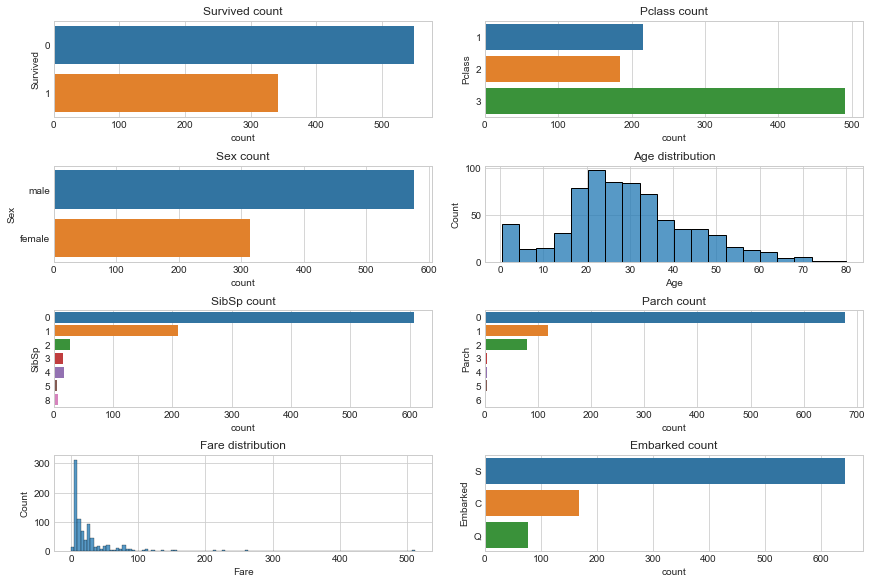

In [106]:
plotting_features(df)

# End